# 1. KNN
- KNN: K개의 가장 가까운(Nearest) 이웃(Neighbors)
- K-최근접 이웃 알고리즘: "유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다."는 가정 하에 말 그대로 가장 가까운 이웃 k개의 라벨을 고려하여 찾고자 하는 데이터의 라벨 값을 정의
- 단순하지만 매우 강력한 장점을 가지고 있으며, 분류와 회귀상황 모두에 사용된다.
- KNN의 장/단점
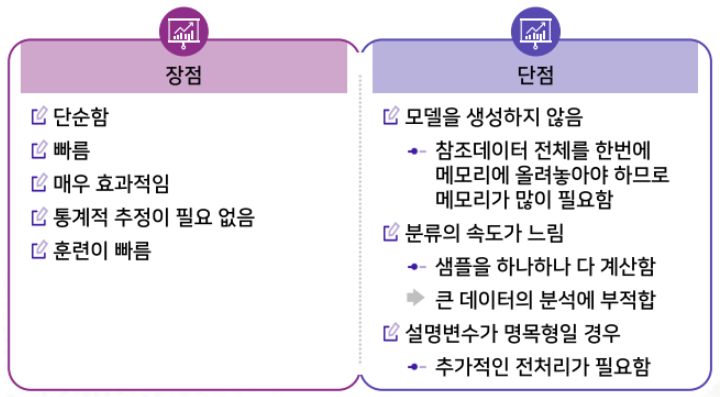
- KNN 작동원리
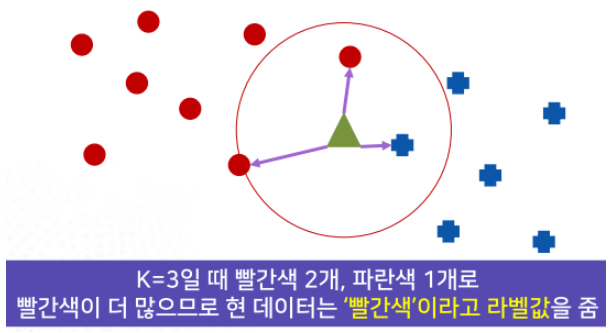
: 두 개의 다른 라벨 값을 가진 데이터가 분포해 있다고 가정할 때, 신규 데이터(세모)의 예측값을 추측하기 위해 찾고자 하는 데이터로부터 가장 가까운 데이터 k개의 특성을 고려한다. (3개의 특성을 고려한 경우 k = 3)

## 1-1. 분류 분석

In [1]:
# 모든 결과물 한꺼번에 display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= "all"

In [7]:
# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
dataset = pd.read_csv('E:\\py_temp\\MachineLearning\\iris.csv')
dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# X값(input 문제지) , y값을 설정해 준다 [ row, col]
data = dataset.iloc[:,0:4]    # 0,1,2,3 컬럼을(1번째 ~ 4번째 변수) data에 넣는다
target = dataset.iloc[:,4]    # 4번 컬럼(5번째 변수)을 target에 넣는다

# sklearn의 모델 선택 패키지에서 train_test_split을 불러온다
from sklearn.model_selection import train_test_split
# test_size의 기본값은 0.25(전체의 25%)이다. 
# 즉, 테스트와 훈련데이터를 25:75 비율로 랜덤하게 섞어준다
# 대문자는 2차원 자료, 소문자는 1차원 자료를 의미한다

X_train, X_test, y_train, y_test = train_test_split(data,target)

In [10]:
X_train.head() # 맨 위에서 5개 샘플 출력
X_test.head()
y_train.head()
y_test.head()

X_train.shape # 데이터 프레임 열/행
X_test.shape
y_train.shape
y_test.shape

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
7,5.0,3.4,1.5,0.2
81,5.5,2.4,3.7,1.0
78,6.0,2.9,4.5,1.5
24,4.8,3.4,1.9,0.2
94,5.6,2.7,4.2,1.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
88,5.6,3.0,4.1,1.3
38,4.4,3.0,1.3,0.2
31,5.4,3.4,1.5,0.4
74,6.4,2.9,4.3,1.3
132,6.4,2.8,5.6,2.2


7         setosa
81    versicolor
78    versicolor
24        setosa
94    versicolor
Name: Species, dtype: object

88     versicolor
38         setosa
31         setosa
74     versicolor
132     virginica
Name: Species, dtype: object

(112, 4)

(38, 4)

(112,)

(38,)

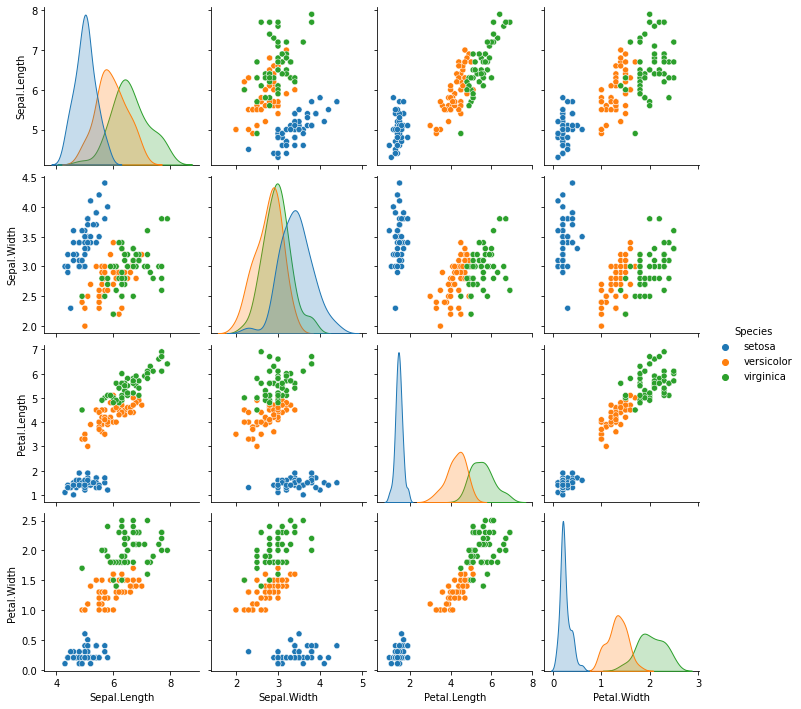

In [12]:
import seaborn as sns 
sns.pairplot(dataset, hue='Species') # hue = 'Species'는 'Species'를 중심으로 값을 분리하라

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

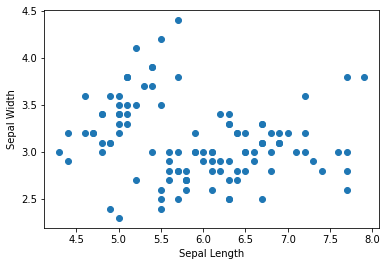

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Sepal.Length'], X_train['Sepal.Width']) # plt.scatter(x축['이름'],y축['이름'])
plt.xlabel("Sepal Length") # x축 명명
plt.ylabel("Sepal Width") # y축 명명
plt.show()

In [14]:
# Step 3: 모델 훈련
from sklearn.neighbors import KNeighborsClassifier

# 하이터 파라메터 설정
knn = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃 몇개를 설정할 것인가?

#설정한 모듈로 학습(fit)실시
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Step 4: 모델의 검정
# 테스트 데이터를 넣어 예측을 수행한다
y_pred = knn.predict(X_test)

# y의 예측값과 y의 테스트값을 비교
result = (y_pred==y_test)
result

import numpy as np
np.sum(result) / len(y_test)*100 # np.sum(result) = True인 값들의 갯수/test갯수*100 = 100에 가까울 수록 정확도 높음 의미

94.73684210526315

In [26]:
# Step 5: 미지의 데이터 
X_new = np.array([[5,2.9,1,0.2]])

result = knn.predict(X_new)
print(result)

['setosa']


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 1-2. 회귀 분석

In [28]:
# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
dataset = pd.read_csv('E:\\py_temp\\MachineLearning\\BostonHousing.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
# X,y 할당하기
X=dataset.iloc[:,0:13] # 0(crim)부터 12(lstat)까지
y=dataset.iloc[:,13] # 13(medv)만

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [31]:
# Step 3: 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

# 파라메터 설정
knn_reg = KNeighborsRegressor(n_neighbors=3)

# 설정한 모듈로 학습(fit)실시
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [32]:
#테스트 데이터 검증
print("\n예측값:", knn_reg.predict(X_test)) # Test를 통해 예측한 y값(medv)
print("\n회귀점수: ", round(knn_reg.score(X_test, y_test), 3)) # Test 점수
# round(계산_내용,n자리숫자까지_보이기)


예측값: [27.76666667 37.8        27.76666667 37.4        16.36666667 12.63333333
 15.26666667 19.4        23.43333333 22.2        35.         21.06666667
 12.36666667 21.76666667 20.06666667 31.06666667 25.4        27.8
 29.56666667 20.83333333 27.76666667 16.06666667 30.36666667 20.56666667
 12.26666667 21.4        15.2        20.76666667 15.53333333 11.43333333
 25.36666667 30.8        22.83333333 19.6        23.96666667 16.5
 27.76666667 17.53333333 23.76666667 19.8        17.5        11.33333333
 21.56666667 30.3        17.83333333 25.7        30.86666667 32.53333333
 19.4        17.73333333 32.73333333 35.         13.93333333 34.7
 15.96666667 20.46666667 27.76666667 27.46666667 22.36666667 11.03333333
 14.3        23.2        23.         21.53333333 17.83333333 19.76666667
 19.86666667 40.83333333 15.26666667 16.36666667 25.73333333 18.83333333
 11.93333333 13.93333333 26.86666667 31.1        35.46666667 13.93333333
 14.4        24.2        11.83333333 38.8        22.06666667 11.96

## 적절한 K 값 찾기
- KNN 사용시 주의사항:
  - k가 너무 작은 경우: 과적합(Overfitting) 문제가 발생하기 쉽다.
  - k가 너무 큰 경우: 성능 자체가 너무 떨어질 수 있다. (과소적합 문제 발생)
- k 값 찾기
  - k는 홀수로 설정하는 것이 좋다.
  - k를 설정하는 통계적 방법이 존재하지 않아 대게 아래와 같은 방법을 이용한다.
  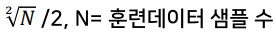
  - 혹은 여러개의 k를 적용해 본 뒤, 테스트 점수가 가장 높은 k 값을 사용한다.
- 공식을 이용한 k 계산
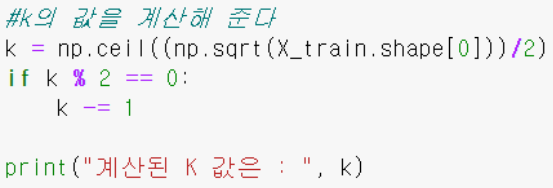

In [36]:
# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
dataset = pd.read_csv('E:\\py_temp\\MachineLearning\\iris.csv')

In [37]:
# STEP 2. X, y값 할당
import numpy as np

# X, y 설정
X= dataset.iloc[:, 0:4]
y= dataset.iloc[:, 4]

print(y.unique()) # 라벨 값들 중 중복없이 unique 한 값만 표시

['setosa' 'versicolor' 'virginica']


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Checking the SPLIT data
X_train.head()
X_test.head()

y_train.head()
y_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: Species, dtype: object

> 훈련데이터 샘플수: 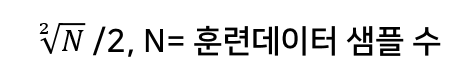

In [46]:
X_train.shape
# 결과(행,열)
# X_train.shape[0] = 행(세로) 갯수, X_train.shape[1] = 열(가로) 갯수
# N = 훈련데이터 샘플 수 = 행 갯수

np.sqrt(X_train.shape[0])
# np.sqrt = 제곱근

k = np.ceil((np.sqrt(X_train.shape[0]))/2)
k
# np.ceil = 반올림

(112, 4)

10.583005244258363

6.0

In [39]:
# k의 값을 계산해 준다

k = np.ceil((np.sqrt(X_train.shape[0]))/2)
if k % 2 == 0: # k 값은 홀수로 설정해야 하기 때문
    k -= 1
    
print("계산된 K 값은 : ", k)

계산된 K 값은 :  5.0


In [49]:
##  KNN Analysis ##
# sklean패키지에서 KNN 분류기를 불러온다
from sklearn.neighbors import KNeighborsClassifier
# 불러온 KNN 분류기를 knn으로 저장한다
# n_neighbors의 값은 앞서 계산한 K 값으로 할당해 준다
knn = KNeighborsClassifier(n_neighbors = int(k))

# 훈련데이터를 모델에 넣어 학습시킨다
knn.fit(X_train, y_train)

## KNN 예측 ##
y_pred = knn.predict(X_test)
result = (y_pred ==y_test)

# 예측결과 정확도 출력
print("정확도 방법1: ", round(np.sum(result) /len(y_test),3))

# 정확도를 출력하는 함수 이용
print('정확도 방법2: ', round(knn.score(X_test,y_test), 3))

KNeighborsClassifier(n_neighbors=6)

정확도 방법1:  0.974
정확도 방법2:  0.974


#### 그레프 그리기
1. 그래프 그리기: plt.plot(x축,y축,label='그래프_이름')
2. 범례 추가하기: plt.legend()

3. 그래프 보이기: plt.show

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=15)

<function matplotlib.pyplot.show(close=None, block=None)>

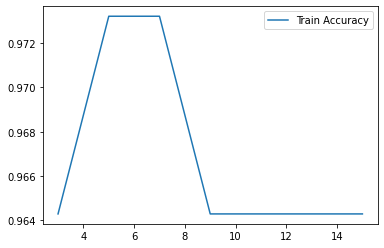

In [51]:
# Trial and Error 기법
# K 숫자 변경해보기 -> 어떤 숫자의 정확도가 높은지 알아본다
import matplotlib.pyplot as plt
train_accuracy = []
n_neighbors_settings = [3,5,7,9,11,13,15]


for n_neighbor in n_neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbor)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    # test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_neighbors_settings, train_accuracy, label="Train Accuracy") # 그래프 그리기
plt.legend() # 그래프에 범례 추가하기
plt.show # 그래프 보이기